In [2]:
import pandas as pd
import numpy as np
import csv
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [3]:
data=pd.read_excel("data2(allmin).xlsx")
data.to_csv('data2(allmin).csv',index=True)
data=data.dropna()


In [4]:
data.head()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 65
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Temperature ©[min]               59 non-null     float64
 1   D.O. (mg/L)[max]                 59 non-null     float64
 2   pH[min]                          59 non-null     float64
 3   Conductivity (μSiemens/cm)[min]  59 non-null     float64
 4   BOD (mg/L)[min]                  59 non-null     float64
 5   Total coliform[min]              59 non-null     float64
dtypes: float64(6)
memory usage: 3.2 KB


Temperature ©[min]                 0
D.O. (mg/L)[max]                   0
pH[min]                            0
Conductivity (μSiemens/cm)[min]    0
BOD (mg/L)[min]                    0
Total coliform[min]                0
dtype: int64

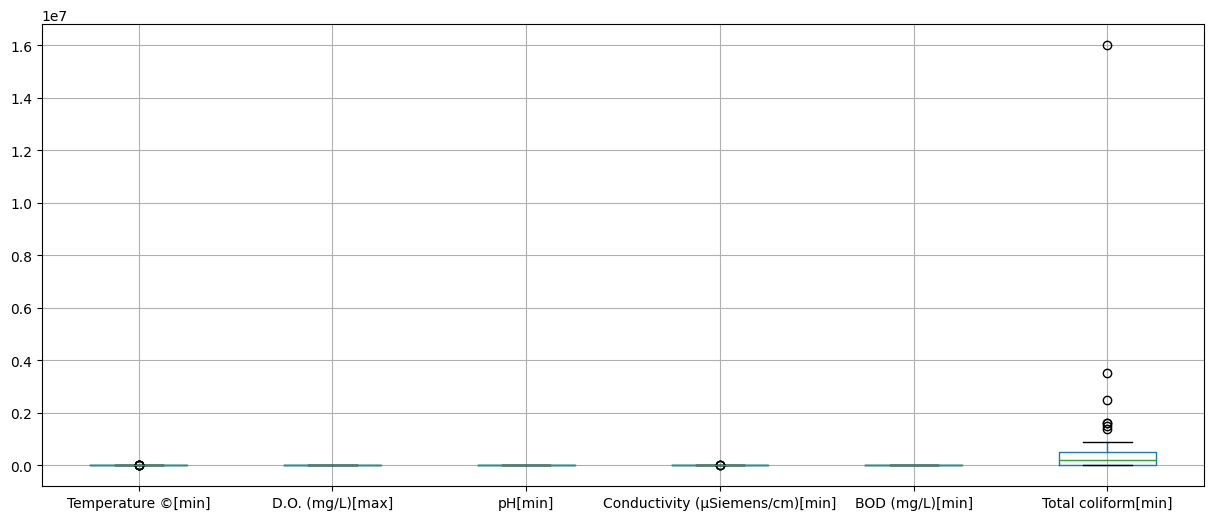

In [5]:
data.boxplot(figsize=(15,6))
plt.show()

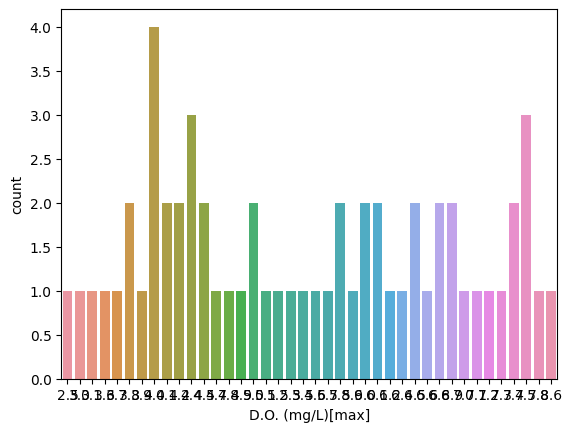

In [7]:
# data["D.O. (mg/l)"].value_counts()
sns.countplot(x=data["D.O. (mg/L)[max]"])
plt.show((15,6))

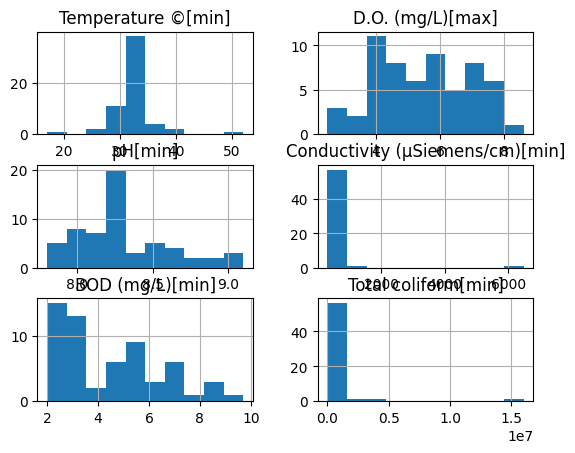

In [8]:
data.hist()
plt.show()

In [9]:
train, test = train_test_split(data,test_size=0.1,random_state=100)
train_features = train.loc[:,data.columns !='D.O. (mg/L)[max]']
test_features = test.loc[:,data.columns !='D.O. (mg/L)[max]']
train_label = train['D.O. (mg/L)[max]']
test_label = test['D.O. (mg/L)[max]']

In [10]:
train_features


,Temperature ©[min],pH[min],Conductivity (μSiemens/cm)[min],BOD (mg/L)[min],Total coliform[min]
56,34.0,9.00,522.0,5.30,1600000.0
32,32.0,7.80,358.0,6.90,160000.0
6,33.0,8.60,550.0,2.00,160000.0
23,28.0,8.00,383.0,2.80,9000.0
0,17.0,8.40,542.0,2.70,9000.0
43,34.0,8.50,365.0,6.60,220000.0
65,33.0,7.98,623.0,3.90,110000.0
12,33.0,8.80,644.0,2.90,3500000.0
5,35.0,9.00,512.0,2.80,160000.0
61,32.0,8.20,783.1,6.50,220000.0


In [11]:
print(train_features.shape)
print(train_label.shape)
print(test_features.shape)
print(test_label.shape)

(53, 5)
(53,)
(6, 5)
(6,)


In [12]:
# scaler=preprocessing.StandardScaler()
# scaler=preprocessing.MaxAbsScaler()
# train_features=scaler.fit_transform(train_features)
# test_features=scaler.fit_transform(test_features)
train_features_new = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(train_features)
test_features_new = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(test_features)

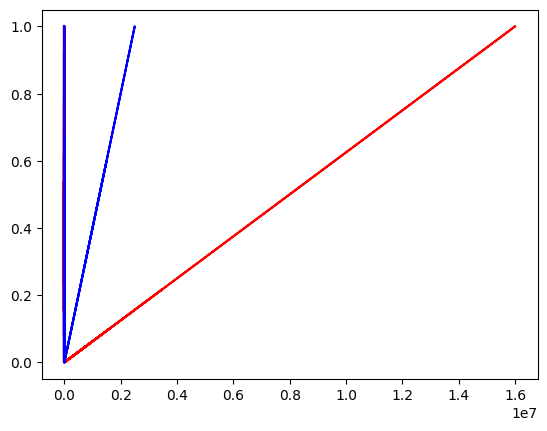

In [13]:
plt.plot(train_features,train_features_new,'red')
plt.plot(test_features,test_features_new,'blue')
plt.show()

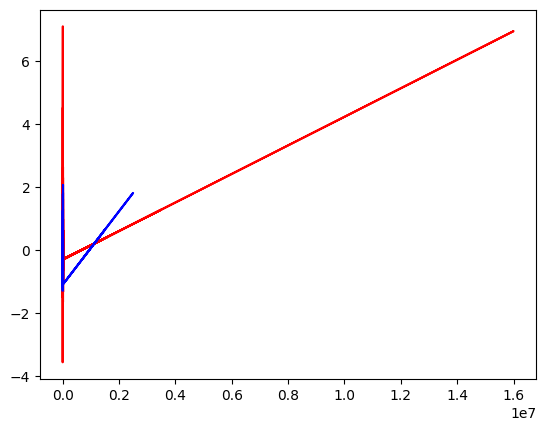

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y1_new=scaler.fit_transform(train_features)
y2_new=scaler.fit_transform(test_features)

plt.plot(train_features,y1_new,'red')
plt.plot(test_features,y2_new,'blue')
plt.show()

In [15]:
# ANFIS MODEL CODE
from Models import myanfis

In [16]:
import sys
sys.maxsize

9223372036854775807

In [17]:
param = myanfis.fis_parameters(
    n_input=5,                # no. of Regressors
    n_memb=8,                 # no. of fuzzy memberships
    batch_size=1,            # 16 / 32 / 64 / ...
    memb_func='gaussian',      # 'gaussian' / 'gbellmf'
    optimizer='sgd',          # sgd / adam / ...
    # mse / mae / huber_loss / mean_absolute_percentage_error / ...
    loss='mse',
    n_epochs=150               # 10 / 25 / 50 / 100 / ...
)

In [18]:
fis = myanfis.ANFIS(n_input=param.n_input,
                    n_memb=param.n_memb,
                    batch_size=param.batch_size,
                    memb_func=param.memb_func,
                    name='myanfis'
                    )

# fis = myanfis.ANFIS(n_input=6,
#                     n_memb=3,
#                     batch_size=1,
#                     memb_func='gaussian',
#                     name='myanfis'
#                     )
# compile model
fis.model.compile(optimizer=param.optimizer,
                    loss=param.loss,
                    metrics=['mse'])

In [19]:
histories=[]
history = fis.fit(train_features_new, train_label,
                    epochs=param.n_epochs,
                    batch_size=param.batch_size,
                    validation_data=(test_features_new, test_label)
                    
                    )
histories.append(history)

Epoch 1/150
53/53 [==============================] - 1s 8ms/step - loss: 32.3857 - mse: 32.3857 - val_loss: 27.0778 - val_mse: 27.0778
Epoch 2/150
53/53 [==============================] - 0s 5ms/step - loss: 32.2087 - mse: 32.2087 - val_loss: 26.9308 - val_mse: 26.9308
Epoch 3/150
53/53 [==============================] - 0s 5ms/step - loss: 31.9438 - mse: 31.9438 - val_loss: 26.7166 - val_mse: 26.7166
Epoch 4/150
53/53 [==============================] - 0s 5ms/step - loss: 31.4988 - mse: 31.4988 - val_loss: 26.3831 - val_mse: 26.3831
Epoch 5/150
53/53 [==============================] - 0s 5ms/step - loss: 30.6926 - mse: 30.6926 - val_loss: 25.7516 - val_mse: 25.7516
Epoch 6/150
53/53 [==============================] - 0s 4ms/step - loss: 29.2220 - mse: 29.2220 - val_loss: 24.3248 - val_mse: 24.3248
Epoch 7/150
53/53 [==============================] - 0s 5ms/step - loss: 22.4322 - mse: 22.4322 - val_loss: 15.1939 - val_mse: 15.1939
Epoch 8/150
53/53 [==============================] - 0s

In [20]:
test_pred=fis(test_features_new)

print(test_pred)

6/6 [==============================] - 0s 2ms/step
[[5.8677225]
 [3.6849911]
 [3.250439 ]
 [7.266034 ]
 [5.841832 ]
 [3.6575866]]


In [21]:
print("MAPE: ", round(mean_absolute_percentage_error(test_label,test_pred),2))
print("r2_score:", round(r2_score(test_label,test_pred),2))
print("MAE: ", round(mean_absolute_error(test_label,test_pred),2))
print("MSE: ", round(mean_squared_error(test_label,test_pred),2))


MAPE:  0.18
r2_score: -1.3
MAE:  0.97
MSE:  1.6


In [22]:

# print("MAE:", round(mean_absolute_error(test_label, test_pred),2))
# print("MAPE = ", round(mean_absolute_percentage_error(test_label, test_pred),2))
# print("MSE = ", round(mean_squared_error(test_label, test_pred),2))
# print("R2_score = ", round(r2_score(test_label, test_pred),2))
for i,j in zip(test_label,test_pred):
    print("actual = ",round(i,2), "predicted = ",round(j[0],2))

actual =  6.1 predicted =  5.87
actual =  4.5 predicted =  3.68
actual =  5.7 predicted =  3.25
actual =  5.8 predicted =  7.27
actual =  5.0 predicted =  5.84
actual =  3.7 predicted =  3.66


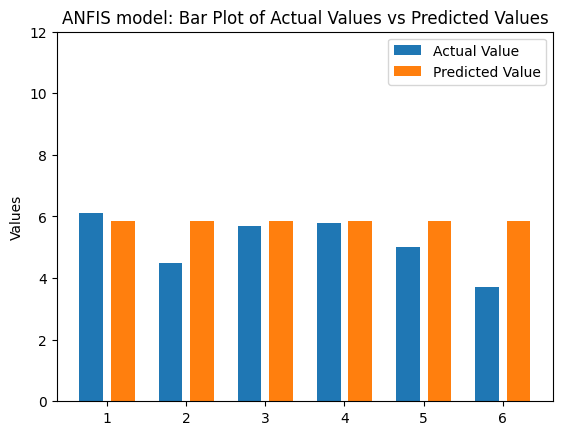

In [23]:
plt.title("ANFIS model: Bar Plot of Actual Values vs Predicted Values")

plt.ylabel("Values")
z = (test_label, test_pred[0])
x = [1,2,3,4,5,6]
base = np.arange(6)
plt.xticks(base, x)
plt.bar(base - 0.2, test_label, 0.3, label = 'Actual Value')
plt.bar(base + 0.2, test_pred[0], 0.3, label = 'Predicted Value')
plt.ylim(top = 12)
plt.legend()
plt.show()